# Import des modules

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
#CTRL + RETURN pour exécuter la cellule

In [141]:
def renvoie_grille(n):
    """Renvoie une liste de listes représentant une grille n x n
    grille[y][x] est le point de coordonnées (x,y)
    Par défaut grille[y][x] est initialisé à False"""
    return [[False] * n for _ in range(n)]

def desssiner_grille(ax, n):
    les_x = []
    les_y = []
    for y in range(n):        
        if y % 2 == 0:
            les_x.extend([0, n - 1])  
        else:
            les_x.extend([n - 1, 0])  
        les_y.extend([y , y])
    for x in range(n):        
        if x % 2 == 0:
            les_y.extend([0, n - 1])  
        else:
            les_y.extend([n - 1, 0])  
        les_x.extend([x , x])
    ax.plot(les_x, les_y, color='gray')

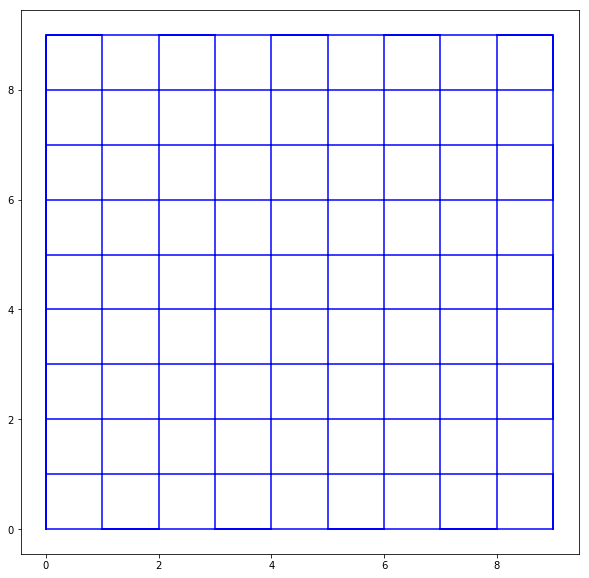

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
desssiner_grille(ax, 10)
plt.show()

In [192]:
import random

def deplacement_aleatoire():
    alea = random.randint(1, 4)
    if alea == 1:
        return (0,1)
    elif alea == 2:
        return (0, -1)
    elif alea == 3:
        return (1,0)
    else:
        return (-1, 0)

def marche_auto_evitante(n):    
    x = n // 2
    y = n // 2
    x_chemin = [x]
    y_chemin = [y]
    grille = renvoie_grille(n)
    impasse = False    
    while not impasse and x > 0 and x < n - 1 and y > 0 and y < n - 1:
        grille[y][x] = True
        if grille[y][x - 1] and grille[y][x + 1]  and grille[y - 1][x] and grille[y + 1][x]:
            impasse = True
        else:
            dx, dy = deplacement_aleatoire()
            if not grille[y + dy][x + dx]:
                x = x + dx
                y = y + dy
                x_chemin.append(x)
                y_chemin.append(y)
    return impasse, x_chemin, y_chemin

In [193]:
def dessiner_marche(n):
    fig, ax = plt.subplots(figsize=(10,10))
    desssiner_grille(ax, n)
    impasse, x_chemin, y_chemin = marche_auto_evitante(n)
    ax.plot(x_chemin, y_chemin,   color = 'red')    
    plt.show()

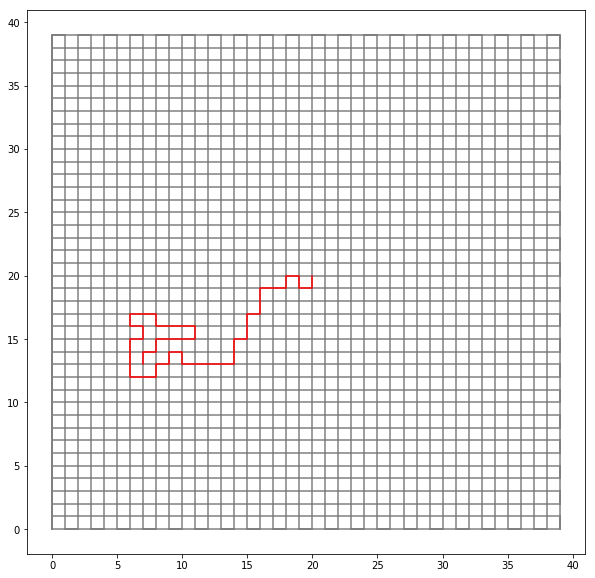

In [194]:
dessiner_marche(40)

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

def animation(n, x_chemin, y_chemin):

   

    fig, ax = plt.subplots(figsize=(10,10))
    desssiner_grille(ax, n)

    #données animation
    marche, = ax.plot([],[],'.-',color="red", label='Marche aléatoire')

       

    def init():
        nonlocal marche
        marche.set_data([], [])
        return (marche,) 

    def animate(i):
        nonlocal marche      
        marche.set_data(x_chemin[:i + 1], y_chemin[:i + 1])    
        return (marche, ) 

    plt.legend(loc='best')
    plt.close ()
    return matplotlib.animation.FuncAnimation(fig, animate, frames=len(x_chemin) ,init_func=init,
                                              blit=False,interval=250)
  
    


n = 30
impasse, x_chemin, y_chemin = marche_auto_evitante(n)
ani = animation(n, x_chemin, y_chemin)
HTML(ani.to_html5_video())
# l'un ou l'autre
#HTML(ani.to_jshtml())

In [196]:
def frequence_echantillon_chemin_marche_auto_evitante(n, nb_essais):
    nb_impasse = 0
    for k in range(nb_essais):
        impasse, x_chemin, y_chemin = marche_auto_evitante(n)
        if impasse:
            nb_impasse = nb_impasse + 1
    return nb_impasse / nb_essais

In [198]:
frequence_echantillon_chemin_marche_auto_evitante(30, 100)

0.55

In [199]:
def graphique_marche_auto_evitante(nb_essais = 100):
    les_n = [k for k in range(10, 81, 10)]
    les_freq = [frequence_echantillon_chemin_marche_auto_evitante(n, nb_essais) for n in les_n]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(les_n, les_freq, ls = '', marker = 'o', color = 'blue')
    plt.title(f"Marche aléatoire auto-évitante, échantillons de taille {nb_essais}")
    plt.ylabel("Fréquence de non sortie de la grille (impasse)")
    plt.xlabel("Taille n de la grille")
    plt.show()

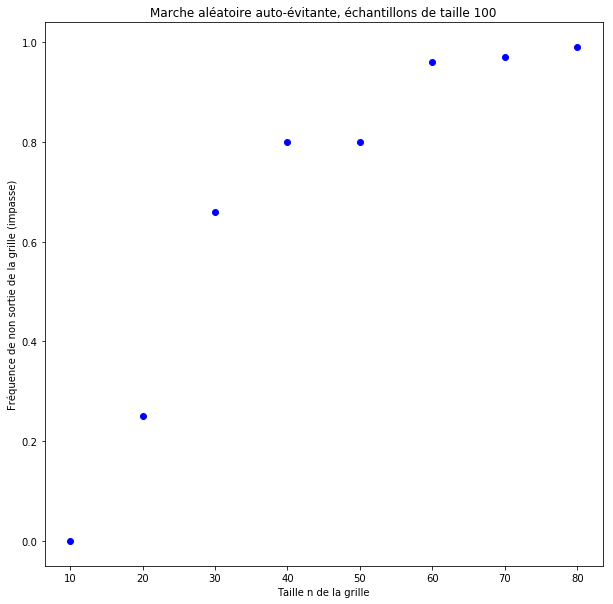

In [201]:
graphique_marche_auto_evitante(nb_essais = 100)